# Importar librerias y el dataset



In [1]:
pip install -r req.txt

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from numpy import genfromtxt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
#from google.colab import files
import io
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Conv2D
from keras.optimizers import SGD
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# Funciones adicionales

## Plot confusion matrix multi label

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('Predicted label')
    axes.set_ylabel('True label')
    axes.set_title("CM for the class - " + class_label)

In [4]:
#Test
y_b =  [1,1,4,1,1,1]
y_b2 = [1,1,3,5,5,5]

In [5]:
def graficar_multi(cm,class_names):
    fig, ax = plt.subplots(4, 3, figsize=(12, 7))

    for axes, cfs_matrix, label in zip(ax.flatten(), cm, class_names):
      print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
        
    fig.tight_layout()
    plt.show()

# Importacion de los dataset y muestra de los datos

## Importamos el dataset de la libreria de keras para poder realizar su visualizacion 

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

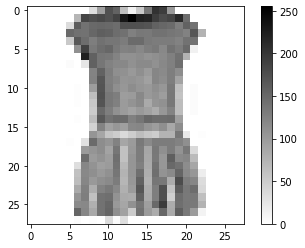

In [7]:
plt.figure()
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

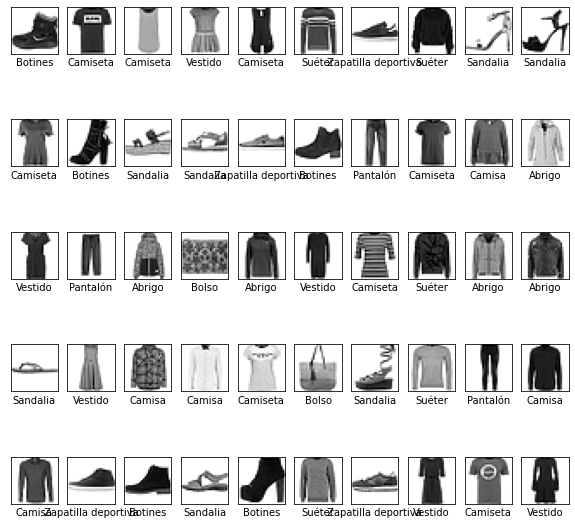

In [9]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
train_images = train_images / 255

In [11]:
test_images = test_images / 255

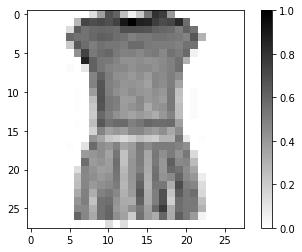

In [12]:
plt.figure()
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Importamos el data set desde los archivos .csv para el entrenamiento del modelo

### Importamos el conjunto de datos de entrenamieto

In [13]:
my_data_1 = genfromtxt('fashion-mnist_train.csv', delimiter=',')

In [14]:
my_data_1 = np.delete(my_data_1, 0, 0)

In [15]:
my_data_1

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_train = np.delete(my_data_1, 0, 1)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y = my_data_1[:,0]
y

array([2., 9., 6., ..., 8., 8., 7.])

In [18]:
y_train = keras.utils.to_categorical(y,num_classes=10)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
X_train.shape

(60000, 784)

In [20]:
y_train.shape

(60000, 10)

### Importamos el conjunto de datos de prueba

In [21]:
my_data_2 = genfromtxt('fashion-mnist_test.csv', delimiter=',')

In [22]:
my_data_2 = np.delete(my_data_2, 0, 0)

In [23]:
my_data_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [24]:
X_test = np.delete(my_data_2, 0, 1)
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
y_2 = my_data_2[:,0]
y_2

array([0., 1., 2., ..., 8., 8., 1.])

In [26]:
y_test = keras.utils.to_categorical(y_2,num_classes=10)
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
X_test.shape

(10000, 784)

In [28]:
y_test.shape

(10000, 10)

In [29]:
y_train_ori_int = y.astype(int) 
y_test_ori_int = y_2.astype(int)

# Modelo inicial

## 1. Probando una clasificador con Navie bayes MultinomialNB

#### Entrenamiento

In [30]:
clf = MultinomialNB()

In [31]:
clf.fit(X_train, y)

MultinomialNB()

#### Resultados

In [32]:
y_naive_bayes = clf.predict(X_train)
y_naive_bayes_test = clf.predict(X_test)

In [33]:
clf.score(X_train, y)

0.6653333333333333

In [34]:
clf.score(X_test, y_2)

0.6674

In [35]:
print('Naive Bayes\n\nTrain:\n')
print('Orden de las etiquetas: \n{}'.format(class_names))
print('Precision por clase: \n{}'.format(precision_score(y, y_naive_bayes, average=None)))
print('Precisión micro: \n{}'.format(precision_score(y, y_naive_bayes, average='micro')))
print('Precisión macro: \n{}'.format(precision_score(y, y_naive_bayes, average='macro')))
print('Precisión pesada: \n{}'.format(precision_score(y, y_naive_bayes, average='weighted')))
print('\n\nTest:\n')
print('Orden de las etiquetas: \n{}'.format(class_names))
print('Precision por clase: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average=None)))
print('Precisión micro: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='micro')))
print('Precisión macro: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='macro')))
print('Precisión pesada: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='weighted')))

Naive Bayes

Train:

Orden de las etiquetas: 
['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']
Precision por clase: 
[0.73621252 0.98050037 0.6224794  0.65457921 0.46304935 0.66151582
 0.33917309 0.59234162 0.88755459 0.69354839]
Precisión micro: 
0.6653333333333333
Precisión macro: 
0.663095434206207
Precisión pesada: 
0.663095434206207


Test:

Orden de las etiquetas: 
['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']
Precision por clase: 
[0.73759542 0.97408207 0.62603306 0.65860806 0.46656649 0.70562771
 0.32599119 0.58712614 0.88677249 0.68760469]
Precisión micro: 
0.6674
Precisión macro: 
0.6656007310886742
Precisión pesada: 
0.6656007310886742


In [36]:
print('Naive Bayes\n\nTrain:\n')
print(classification_report(y_true=y_train_ori_int,y_pred=y_naive_bayes,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_true=y_test_ori_int, y_pred=y_naive_bayes_test,target_names=class_names))

Naive Bayes

Train:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.79      0.76      6000
           Pantalón       0.98      0.89      0.93      6000
             Suéter       0.62      0.59      0.61      6000
            Vestido       0.65      0.88      0.75      6000
             Abrigo       0.46      0.63      0.53      6000
           Sandalia       0.66      0.15      0.24      6000
             Camisa       0.34      0.16      0.22      6000
Zapatilla deportiva       0.59      0.92      0.72      6000
              Bolso       0.89      0.81      0.85      6000
            Botines       0.69      0.83      0.76      6000

           accuracy                           0.67     60000
          macro avg       0.66      0.67      0.64     60000
       weighted avg       0.66      0.67      0.64     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.77      0.75 

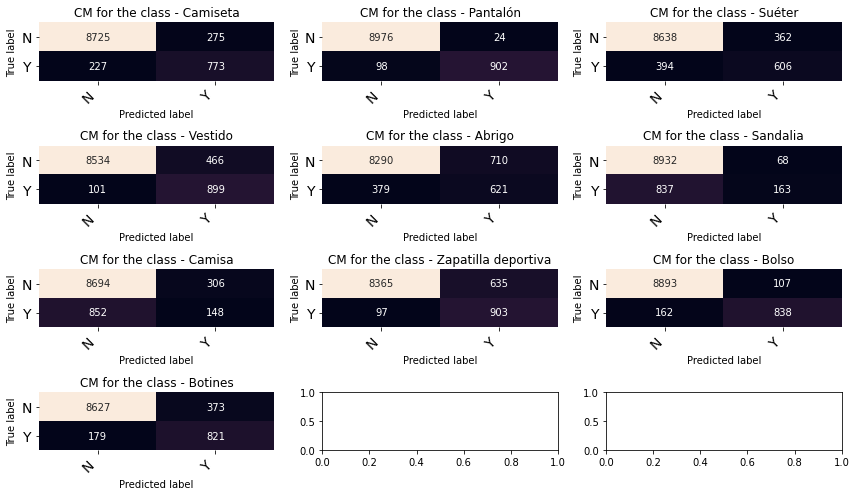

In [37]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_test_ori_int,y_pred=y_naive_bayes_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 2. Probando utilizando un arbol de desicion

#### Entrenando

In [38]:
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y)

In [39]:
dtree_model.score(X_train, y)

0.8479833333333333

#### Resultados

In [40]:
y_dtree_train = dtree_model.predict(X_train)
y_dtree_test = dtree_model.predict(X_test)

In [41]:
print('Arbol de decision\n\nTrain:\n')
print(classification_report(y_pred=y_dtree_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_dtree_test,y_true=y_test_ori_int,target_names=class_names))

Arbol de decision

Train:

                     precision    recall  f1-score   support

           Camiseta       0.80      0.85      0.82      6000
           Pantalón       0.99      0.94      0.97      6000
             Suéter       0.76      0.69      0.73      6000
            Vestido       0.84      0.86      0.85      6000
             Abrigo       0.66      0.78      0.72      6000
           Sandalia       0.97      0.93      0.95      6000
             Camisa       0.66      0.60      0.63      6000
Zapatilla deportiva       0.90      0.95      0.92      6000
              Bolso       0.97      0.94      0.96      6000
            Botines       0.95      0.93      0.94      6000

           accuracy                           0.85     60000
          macro avg       0.85      0.85      0.85     60000
       weighted avg       0.85      0.85      0.85     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.75      0.79     

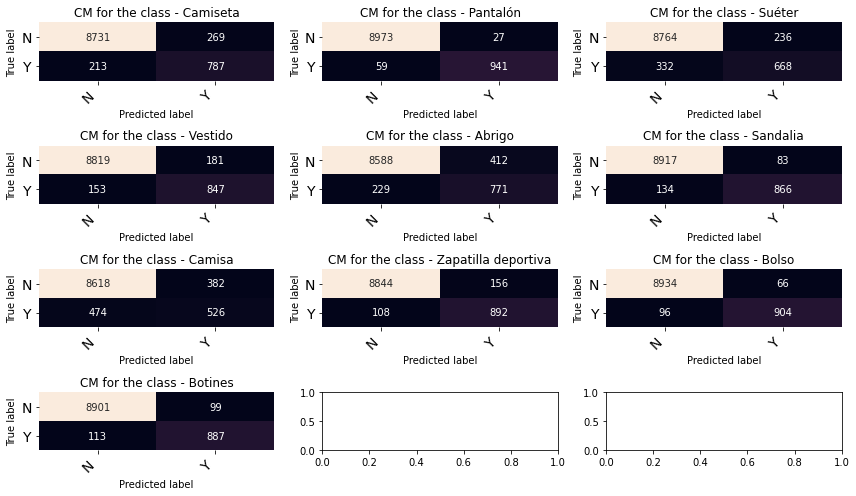

In [168]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_dtree_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 3. Red neuronal

### Entrenamineto

In [43]:
keras.backend.clear_session()
model_keras = Sequential()

In [44]:
model_keras.add(Dense(units=100,activation='relu',input_dim=784))
model_keras.add(Dense(units=10,activation='softmax'))

In [45]:
model_keras.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
scaler = MinMaxScaler()
X_train_norm = X_train/255

In [167]:
history = model_keras.fit(X_train_norm, y_train, epochs=100, batch_size=1024)

Epoch 1/100
59/59 [==============================] - 0s 6ms/step - loss: 0.7066 - accuracy: 0.7651
Epoch 2/100
59/59 [==============================] - 0s 6ms/step - loss: 0.7049 - accuracy: 0.7653
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7033 - accuracy: 0.7662
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7017 - accuracy: 0.7667
Epoch 5/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.7671
Epoch 6/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.7675
Epoch 7/100
59/59 [==============================] - 0s 6ms/step - loss: 0.6969 - accuracy: 0.7682
Epoch 8/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.7685
Epoch 9/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.7691
Epoch 10/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.7699
Epoch 11/

59/59 [==============================] - 0s 5ms/step - loss: 0.6140 - accuracy: 0.7958
Epoch 84/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6133 - accuracy: 0.7961
Epoch 85/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6125 - accuracy: 0.7960
Epoch 86/100
59/59 [==============================] - 0s 6ms/step - loss: 0.6118 - accuracy: 0.7962
Epoch 87/100
59/59 [==============================] - 0s 6ms/step - loss: 0.6110 - accuracy: 0.7966
Epoch 88/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6103 - accuracy: 0.7968
Epoch 89/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6095 - accuracy: 0.7972
Epoch 90/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.7975
Epoch 91/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6081 - accuracy: 0.7976
Epoch 92/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6073 - accuracy: 0.7980
Epoch 93/100


### Resultados

In [48]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


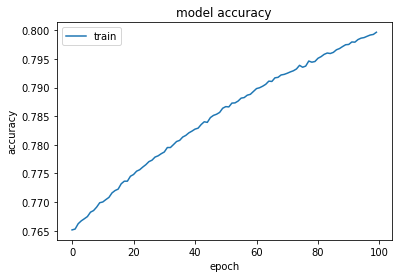

In [169]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [49]:
y_keras_train_one_hot = model_keras.predict(X_train)
y_keras_test_one_hot = model_keras.predict(X_test)

In [50]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [51]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.80      0.77      6000
           Pantalón       0.97      0.93      0.95      6000
             Suéter       0.67      0.64      0.66      6000
            Vestido       0.74      0.85      0.79      6000
             Abrigo       0.55      0.75      0.64      6000
           Sandalia       0.98      0.48      0.65      6000
             Camisa       0.48      0.23      0.31      6000
Zapatilla deportiva       0.70      0.87      0.78      6000
              Bolso       0.89      0.92      0.90      6000
            Botines       0.75      0.94      0.83      6000

           accuracy                           0.74     60000
          macro avg       0.75      0.74      0.73     60000
       weighted avg       0.75      0.74      0.73     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.72      0.77      0.75

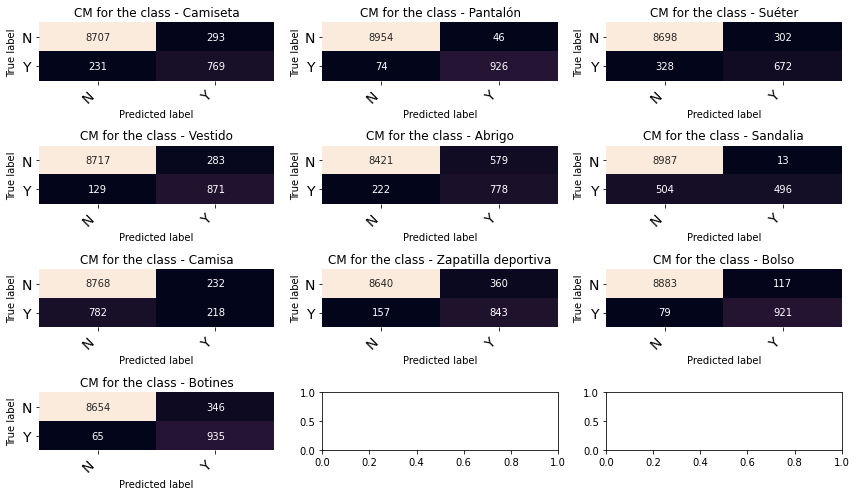

In [52]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## Evaluacion del Desempeño

### Resultados de los modelos

#### 1. Naive Bayes Multinomial

In [53]:
print('Naive Bayes\n\nTrain:\n')
print(classification_report(y_true=y_train_ori_int,y_pred=y_naive_bayes,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_true=y_test_ori_int, y_pred=y_naive_bayes_test,target_names=class_names))

Naive Bayes

Train:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.79      0.76      6000
           Pantalón       0.98      0.89      0.93      6000
             Suéter       0.62      0.59      0.61      6000
            Vestido       0.65      0.88      0.75      6000
             Abrigo       0.46      0.63      0.53      6000
           Sandalia       0.66      0.15      0.24      6000
             Camisa       0.34      0.16      0.22      6000
Zapatilla deportiva       0.59      0.92      0.72      6000
              Bolso       0.89      0.81      0.85      6000
            Botines       0.69      0.83      0.76      6000

           accuracy                           0.67     60000
          macro avg       0.66      0.67      0.64     60000
       weighted avg       0.66      0.67      0.64     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.77      0.75 

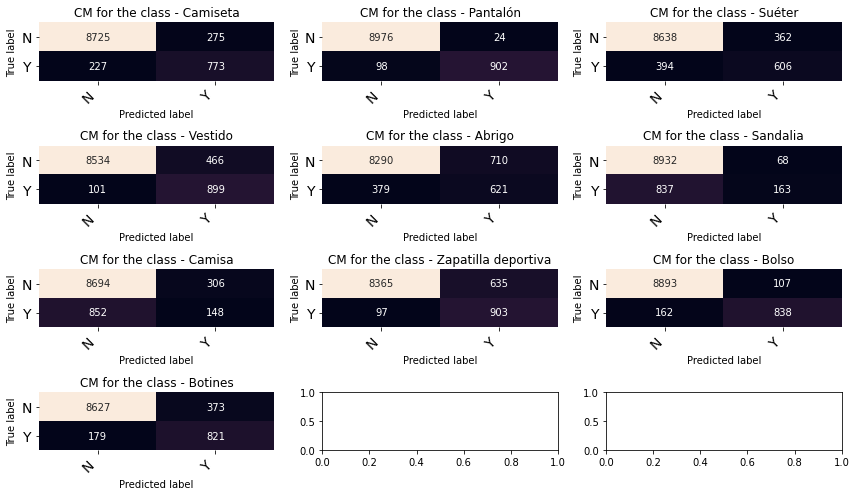

In [54]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_naive_bayes_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

#### 2.  Arbol de decision

In [55]:
print('Arbol de decision\n\nTrain:\n')
print(classification_report(y_pred=y_dtree_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_dtree_test,y_true=y_test_ori_int,target_names=class_names))

Arbol de decision

Train:

                     precision    recall  f1-score   support

           Camiseta       0.80      0.85      0.82      6000
           Pantalón       0.99      0.94      0.97      6000
             Suéter       0.76      0.69      0.73      6000
            Vestido       0.84      0.86      0.85      6000
             Abrigo       0.66      0.78      0.72      6000
           Sandalia       0.97      0.93      0.95      6000
             Camisa       0.66      0.60      0.63      6000
Zapatilla deportiva       0.90      0.95      0.92      6000
              Bolso       0.97      0.94      0.96      6000
            Botines       0.95      0.93      0.94      6000

           accuracy                           0.85     60000
          macro avg       0.85      0.85      0.85     60000
       weighted avg       0.85      0.85      0.85     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.75      0.79     

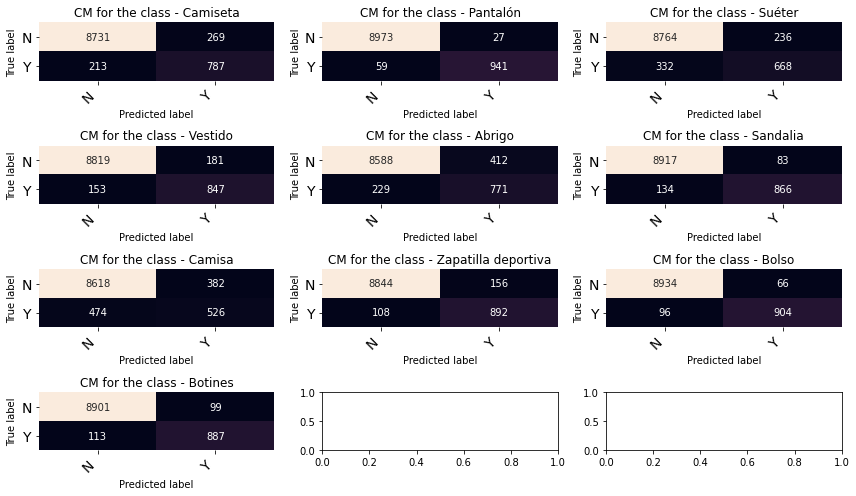

In [56]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_dtree_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

#### 3. Red neuronal

In [57]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.80      0.77      6000
           Pantalón       0.97      0.93      0.95      6000
             Suéter       0.67      0.64      0.66      6000
            Vestido       0.74      0.85      0.79      6000
             Abrigo       0.55      0.75      0.64      6000
           Sandalia       0.98      0.48      0.65      6000
             Camisa       0.48      0.23      0.31      6000
Zapatilla deportiva       0.70      0.87      0.78      6000
              Bolso       0.89      0.92      0.90      6000
            Botines       0.75      0.94      0.83      6000

           accuracy                           0.74     60000
          macro avg       0.75      0.74      0.73     60000
       weighted avg       0.75      0.74      0.73     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.72      0.77      0.75

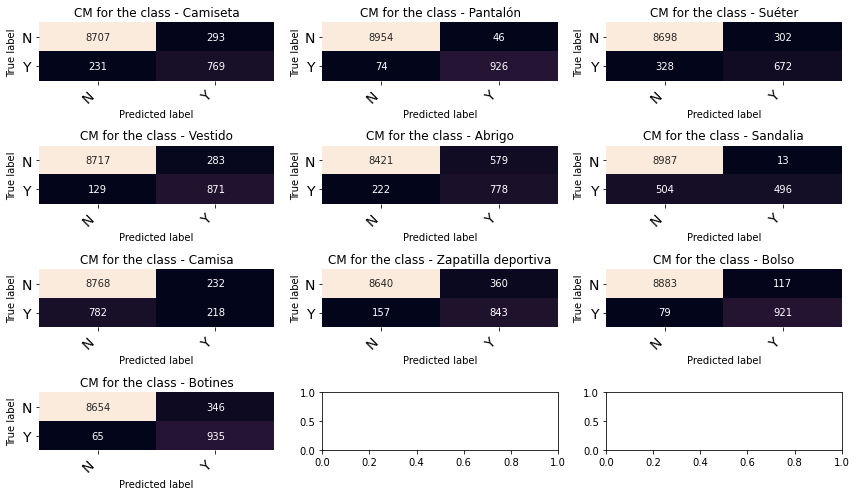

In [58]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

#### graficar curva de error

## ver bias y varianza

# Optimizacion

## 1. Normalizacion

### 1.1 Creando el modelo inical pero con datos normalizados

In [59]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [60]:
keras.backend.clear_session()
model_norm = Sequential()
model_norm.add(Dense(10,activation='relu',input_dim=784))
model_norm.add(Dense(10,activation='softmax'))
model_norm.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model_norm.fit(X_train_norm, y_train, epochs=25, verbose=0)

### 1.2 Evaluacion del modelo Normalizado

In [61]:
model_norm.evaluate(X_train_norm, y_train)

1875/1875 [==============================] - 1s 462us/step - loss: 0.3491 - accuracy: 0.8796


[0.34911707043647766, 0.8795999884605408]

In [62]:
model_norm.evaluate(X_test_norm, y_test)

313/313 [==============================] - 0s 732us/step - loss: 0.4225 - accuracy: 0.8562


[0.42253053188323975, 0.8561999797821045]

In [63]:
y_keras_train_one_hot = model_norm.predict(X_train_norm)
y_keras_test_one_hot = model_norm.predict(X_test_norm)

In [64]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [65]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.82      0.84      0.83      6000
           Pantalón       0.99      0.96      0.97      6000
             Suéter       0.79      0.80      0.80      6000
            Vestido       0.87      0.90      0.89      6000
             Abrigo       0.78      0.81      0.80      6000
           Sandalia       0.96      0.97      0.97      6000
             Camisa       0.70      0.66      0.68      6000
Zapatilla deportiva       0.95      0.95      0.95      6000
              Bolso       0.98      0.95      0.96      6000
            Botines       0.96      0.95      0.96      6000

           accuracy                           0.88     60000
          macro avg       0.88      0.88      0.88     60000
       weighted avg       0.88      0.88      0.88     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.78      0.80      0.79

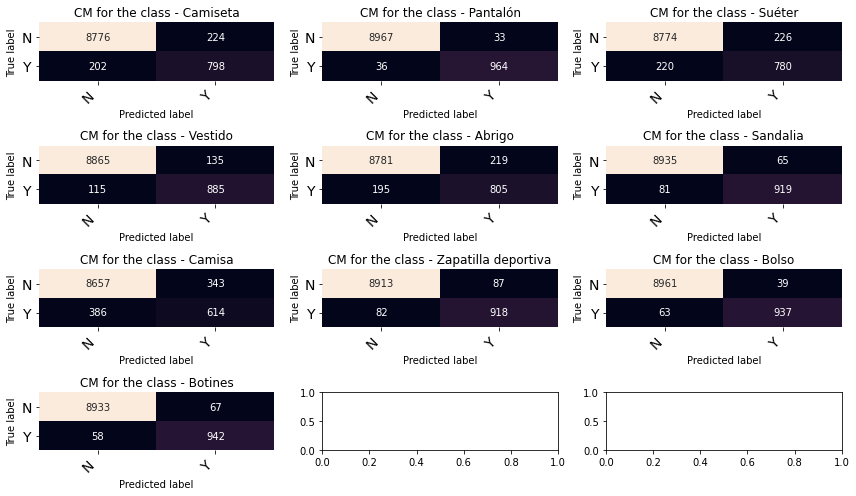

In [66]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 2. Estandariacion

### 2.1 Creacion del modelo inical con datos estandarizados

In [67]:
scaler_2 = StandardScaler()
scaler_2.fit(X_train)
X_train_stand = scaler_2.transform(X_train)
X_test_stand = scaler_2.transform(X_test)

In [68]:
keras.backend.clear_session()
model_std = Sequential()
model_std.add(Dense(10,activation='relu',input_dim=784))
model_std.add(Dense(10,activation='softmax'))
model_std.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model_std.fit(X_train_stand, y_train, epochs=25, verbose=0)

### 2.2 Evaluacion del Modelo estandarizado

In [69]:
model_std.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 464us/step - loss: 0.3657 - accuracy: 0.8815


[0.36574798822402954, 0.881516695022583]

In [70]:
model_std.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 712us/step - loss: 0.5486 - accuracy: 0.8522


[0.5486395359039307, 0.8521999716758728]

In [71]:
y_keras_train_one_hot = model_std.predict(X_train_stand)
y_keras_test_one_hot = model_std.predict(X_test_stand)

In [72]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [73]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.83      0.85      0.84      6000
           Pantalón       0.98      0.96      0.97      6000
             Suéter       0.77      0.83      0.80      6000
            Vestido       0.86      0.91      0.88      6000
             Abrigo       0.80      0.81      0.80      6000
           Sandalia       0.96      0.96      0.96      6000
             Camisa       0.73      0.63      0.68      6000
Zapatilla deportiva       0.93      0.96      0.94      6000
              Bolso       0.96      0.96      0.96      6000
            Botines       0.97      0.95      0.96      6000

           accuracy                           0.88     60000
          macro avg       0.88      0.88      0.88     60000
       weighted avg       0.88      0.88      0.88     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.79      0.81      0.80

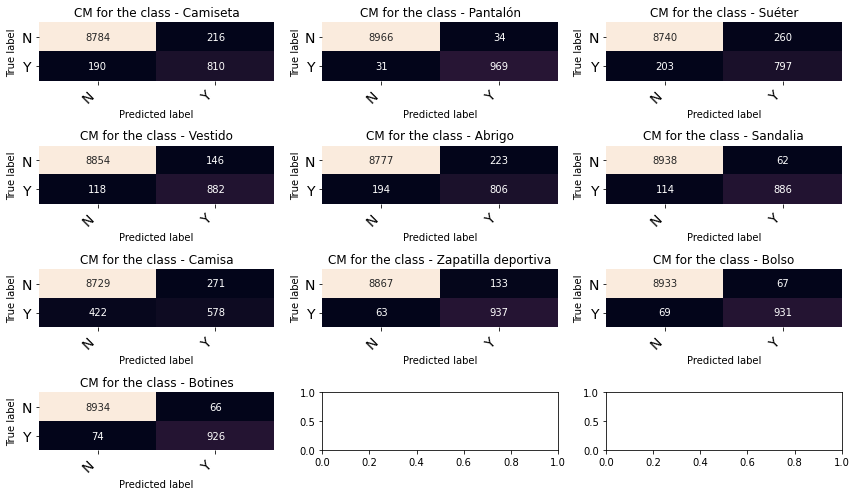

In [74]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

### De lo anterior podemos concluir que para este caso es mejor usar estandarizacion

## 3. Modelo con ADAM

### 3.1 Creacion del modelo inicial con ADAM

In [75]:
keras.backend.clear_session()
model_adam = Sequential()
model_adam.add(Dense(10,activation='relu',input_dim=784))
model_adam.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam()
model_adam.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_adam.fit(X_train_stand, y_train, epochs=25, verbose=0)

### 3.2 Evaluacion del modelo con ADAM

In [76]:
model_adam.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 441us/step - loss: 0.2986 - accuracy: 0.8927


[0.29856351017951965, 0.892716646194458]

In [77]:
model_adam.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 703us/step - loss: 0.4150 - accuracy: 0.8613


[0.41500717401504517, 0.861299991607666]

In [78]:
y_keras_train_one_hot = model_adam.predict(X_train_stand)
y_keras_test_one_hot = model_adam.predict(X_test_stand)

In [79]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [80]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.84      0.85      0.85      6000
           Pantalón       0.99      0.98      0.98      6000
             Suéter       0.82      0.81      0.81      6000
            Vestido       0.87      0.91      0.89      6000
             Abrigo       0.80      0.82      0.81      6000
           Sandalia       0.97      0.98      0.98      6000
             Camisa       0.75      0.69      0.72      6000
Zapatilla deportiva       0.97      0.94      0.96      6000
              Bolso       0.97      0.97      0.97      6000
            Botines       0.95      0.98      0.96      6000

           accuracy                           0.89     60000
          macro avg       0.89      0.89      0.89     60000
       weighted avg       0.89      0.89      0.89     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.80      0.80      0.80

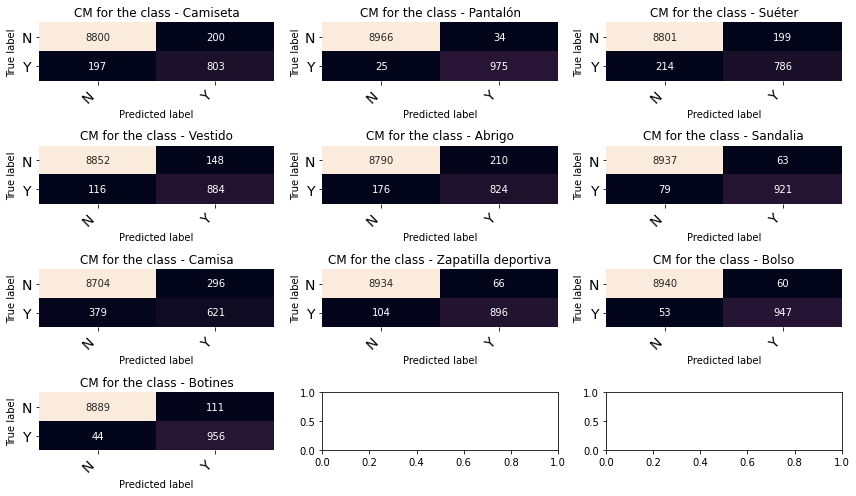

In [81]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 4. Modelo con Minibatch

### 4.1 Creamos una funcion que crea modelos un tamaño de mini batch 2^n

In [82]:
def correr_modelo_mini_batch(batch_size):
    keras.backend.clear_session()
    model_mini_batch = Sequential()
    model_mini_batch.add(Dense(10,activation='relu',input_dim=784))
    model_mini_batch.add(Dense(10,activation='softmax'))
    optimizer = optimizers.Adam()
    model_mini_batch.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    model_mini_batch.fit(X_train_stand, y_train, epochs=25, batch_size=batch_size, verbose=0)
    return model_mini_batch.evaluate(X_train_stand, y_train)

### 4.2 Creamos modelos con distintos tamaños de mini batch y guardamos su presicion

In [83]:
batch_size = []
acc_value = []
for i in range(3, 14):
  batch_size.append(i)
  acc_value.append(correr_modelo_mini_batch(2**i)[1])

1875/1875 [==============================] - 1s 596us/step - loss: 0.5009 - accuracy: 0.8253


### 4.3 Graficamos la presicion de cada modelo dependiendo del numero de mini batch

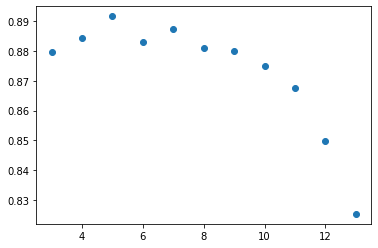

In [84]:
plt.scatter(batch_size,acc_value)
plt.show()

### 4.4 Dado lo anterior el mejor numeor de minibatch es 2^5

## 5. Modelo Inicial Optimizado

In [85]:
keras.backend.clear_session()
model_opt = Sequential()
model_opt.add(Dense(10,activation='relu',input_dim=784))
model_opt.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam()
model_opt.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model_opt.fit(X_train_stand, y_train, epochs=25,  batch_size=2**5)

Epoch 1/25
1875/1875 [==============================] - 1s 698us/step - loss: 0.5509 - accuracy: 0.8095
Epoch 2/25
1875/1875 [==============================] - 1s 699us/step - loss: 0.4197 - accuracy: 0.8512
Epoch 3/25
1875/1875 [==============================] - 1s 690us/step - loss: 0.3948 - accuracy: 0.8597
Epoch 4/25
1875/1875 [==============================] - 1s 699us/step - loss: 0.3826 - accuracy: 0.8631
Epoch 5/25
1875/1875 [==============================] - 1s 724us/step - loss: 0.3729 - accuracy: 0.8666
Epoch 6/25
1875/1875 [==============================] - 1s 777us/step - loss: 0.3661 - accuracy: 0.8684
Epoch 7/25
1875/1875 [==============================] - 1s 778us/step - loss: 0.3606 - accuracy: 0.8704
Epoch 8/25
1875/1875 [==============================] - 1s 780us/step - loss: 0.3551 - accuracy: 0.8706
Epoch 9/25
1875/1875 [==============================] - 1s 788us/step - loss: 0.3517 - accuracy: 0.8736
Epoch 10/25
1875/1875 [==============================] - 2s 806u

### 5.1 Evaluacion del modelo inicial optimizado

In [86]:
model_opt.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 492us/step - loss: 0.3081 - accuracy: 0.8869


[0.30808374285697937, 0.8869333267211914]

In [87]:
model_opt.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 732us/step - loss: 0.4066 - accuracy: 0.8588


[0.40659183263778687, 0.8587999939918518]

In [88]:
y_keras_train_one_hot = model_opt.predict(X_train_stand)
y_keras_test_one_hot = model_opt.predict(X_test_stand)

In [89]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [90]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.83      0.85      0.84      6000
           Pantalón       0.99      0.97      0.98      6000
             Suéter       0.81      0.78      0.79      6000
            Vestido       0.87      0.90      0.88      6000
             Abrigo       0.78      0.84      0.81      6000
           Sandalia       0.99      0.96      0.97      6000
             Camisa       0.74      0.66      0.70      6000
Zapatilla deportiva       0.94      0.96      0.95      6000
              Bolso       0.97      0.97      0.97      6000
            Botines       0.96      0.97      0.96      6000

           accuracy                           0.89     60000
          macro avg       0.89      0.89      0.89     60000
       weighted avg       0.89      0.89      0.89     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.79      0.81      0.80

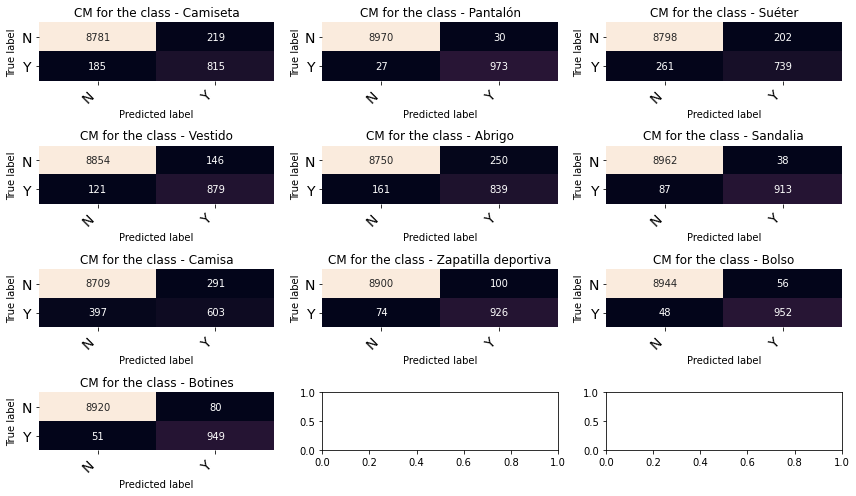

In [91]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

# Iniciar busqueda de hyperparametros


## 1. Caso BIAS

### 1.1 Tasa de aprendizaje

In [92]:
def correr_modelo_learing_rate(learning_rate):
    keras.backend.clear_session()
    model_ta = Sequential()
    model_ta.add(Dense(10,activation='relu',input_dim=784))
    model_ta.add(Dense(10,activation='softmax'))
    optimizer = optimizers.Adam(learning_rate)
    model_ta.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    model_ta.fit(X_train_stand, y_train, epochs=40,  batch_size=2**5, verbose=0)
    return model_ta.evaluate(X_train_stand, y_train)

#### Codigo que evalua la tasa de aprendizaje con 1/(10^n)

In [93]:
learn_list = []
acc_value = []
for i in range(2, 8):
  learn_list.append(i)
  acc_value.append(correr_modelo_learing_rate(1/(10**i))[1])

1875/1875 [==============================] - 1s 475us/step - loss: 2.0211 - accuracy: 0.2780


#### Graficamos la presicion dependiendo de la tasa de aprendizaje

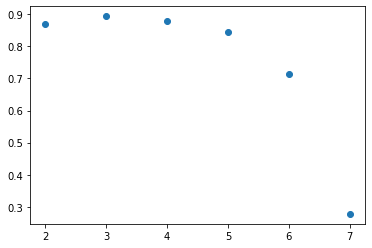

In [94]:
plt.scatter(learn_list,acc_value)
plt.show()

#### Codigo que evalua la tasa de aprendizaje con n/(10^3)

In [109]:
learn_list = []
acc_value = []
for i in range(1, 13):
  learn_list.append(i)
  acc_value.append(correr_modelo_learing_rate(i/(10**3))[1])

1875/1875 [==============================] - 1s 450us/step - loss: 0.4345 - accuracy: 0.8450


#### Graficamos la presicion dependiendo de la tasa de aprendizaje

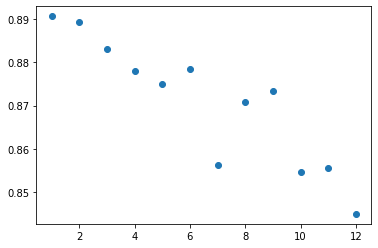

In [110]:
plt.scatter(learn_list,acc_value)
plt.show()

### Dado lo anterior la mejor tasa de aprendizaje es 0.001

### 1.2 Numero de capas


#### Creamos una funcion crear modelos inicales optimiados con n capas

In [111]:
def correr_modelo_num_layers(num_layers):
    keras.backend.clear_session()
    model_lay = Sequential()
    model_lay.add(Dense(10,activation='relu',input_dim=784))
    for i in range(0,num_layers):
         model_lay.add(Dense(10,activation='relu'))
    model_lay.add(Dense(10,activation='softmax'))
    optimizer = optimizers.Adam(0.001)
    model_lay.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    model_lay.fit(X_train_stand, y_train, epochs=40,  batch_size=2**5, verbose=0)
    return model_lay.evaluate(X_train_stand, y_train)

In [112]:
learn_list = []
acc_value = []
for i in range(1, 14):
  learn_list.append(i+1)
  acc_value.append(correr_modelo_num_layers(i)[1])

1875/1875 [==============================] - 1s 557us/step - loss: 0.3701 - accuracy: 0.8671


#### Graficamos la presicion del modelo dependiendo del numero de capas

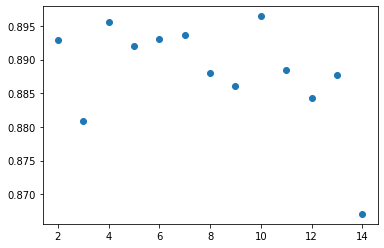

In [113]:
plt.scatter(learn_list,acc_value)
plt.show()

###  Dado lo anterior el mejor numero de capas es 5

### 1.3 Numero nodos

#### Creamos una funcion para correr modelos con n numeros en todas sus capas

In [114]:
def correr_modelo_same_num_nodes(num_nodes):
    keras.backend.clear_session()
    model_same_node_num = Sequential()
    model_same_node_num.add(Dense(num_nodes,activation='relu',input_dim=784))
    model_same_node_num.add(Dense(num_nodes,activation='relu'))
    model_same_node_num.add(Dense(num_nodes,activation='relu'))
    model_same_node_num.add(Dense(num_nodes,activation='relu'))
    model_same_node_num.add(Dense(num_nodes,activation='relu'))
    model_same_node_num.add(Dense(10,activation='softmax'))
    optimizer = optimizers.Adam(0.001)
    model_same_node_num.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    model_same_node_num.fit(X_train_stand, y_train, epochs=15,  batch_size=2**5, verbose=0)
    return model_same_node_num.evaluate(X_train_stand, y_train)

#### Vamos a crear modelos saltando de a 30 nodos por capa

In [115]:
learn_list = []
acc_value = []
for i in range(0, 6):
  if(i == 0):
    learn_list.append(10)
    acc_value.append(correr_modelo_same_num_nodes(10)[1])
  else:
    learn_list.append(30*i)
    acc_value.append(correr_modelo_same_num_nodes(30*i)[1])

1875/1875 [==============================] - 2s 846us/step - loss: 0.1449 - accuracy: 0.9439


#### Graficamos la presicion de cada modelo dependiendo del numero de nodos

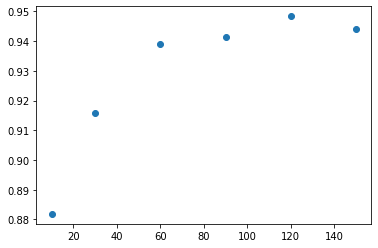

In [116]:
plt.scatter(learn_list,acc_value)
plt.show()

#### Creamos una funcion para correr modelos donde el numero de nodos deciende por cada capa

In [117]:
def correr_modelo_num_decend(num_nodes):
    keras.backend.clear_session()
    model_descend = Sequential()
    model_descend.add(Dense(num_nodes[0],activation='relu',input_dim=784))
    model_descend.add(Dense(num_nodes[1],activation='relu'))
    model_descend.add(Dense(num_nodes[2],activation='relu'))
    model_descend.add(Dense(num_nodes[3],activation='relu'))
    model_descend.add(Dense(num_nodes[4],activation='relu'))
    model_descend.add(Dense(10,activation='softmax'))
    optimizer = optimizers.Adam(0.001)
    model_descend.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    model_descend.fit(X_train_stand, y_train, epochs=15,  batch_size=2**5, verbose=0)
    return model_descend.evaluate(X_train_stand, y_train)

#### Se va a hacer pruebas con los siguientes esquemas descendentes

In [118]:
for i in range(9, 17):
    listnum = []
    listnum.append(i*10)
    listnum.append((i*10)-i)
    listnum.append(i*5)
    listnum.append((i*5)-i)
    listnum.append(i)
    print("Numero Nodos por capa")
    print(listnum)

Numero Nodos por capa
[90, 81, 45, 36, 9]
Numero Nodos por capa
[100, 90, 50, 40, 10]
Numero Nodos por capa
[110, 99, 55, 44, 11]
Numero Nodos por capa
[120, 108, 60, 48, 12]
Numero Nodos por capa
[130, 117, 65, 52, 13]
Numero Nodos por capa
[140, 126, 70, 56, 14]
Numero Nodos por capa
[150, 135, 75, 60, 15]
Numero Nodos por capa
[160, 144, 80, 64, 16]


In [119]:
learn_list = []
acc_value = []
for i in range(9, 17):
    learn_list.append(i*10)
    listnum = []
    listnum.append(i*10)
    listnum.append((i*10)-i)
    listnum.append(i*5)
    listnum.append((i*5)-i)
    listnum.append(i)
    acc_value.append(correr_modelo_num_decend(listnum)[1])

1875/1875 [==============================] - 1s 644us/step - loss: 0.1622 - accuracy: 0.9437


#### Dependiendo del numero de nodos graficamos la presicion

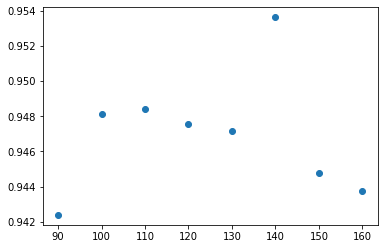

In [120]:
plt.scatter(learn_list,acc_value)
plt.show()

#### Dado lo anterior seleccionamos el modelo con las siguientes caracteristicas

In [121]:
model = [140, 126, 70, 56, 14]
model

[140, 126, 70, 56, 14]

### 1.4 Evaluacion del modelo con los hyper parametros encontrados anteriormente

In [122]:
keras.backend.clear_session()
model_hyperparameters = Sequential()
model_hyperparameters.add(Dense(140,activation='relu',input_dim=784))
model_hyperparameters.add(Dense(126,activation='relu'))
model_hyperparameters.add(Dense(70,activation='relu'))
model_hyperparameters.add(Dense(56,activation='relu'))
model_hyperparameters.add(Dense(14,activation='relu'))
model_hyperparameters.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam(0.001)
model_hyperparameters.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model_hyperparameters.fit(X_train_stand, y_train, epochs=25,  batch_size=2**5)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4968 - accuracy: 0.8232
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3510 - accuracy: 0.8722
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3148 - accuracy: 0.8850
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2875 - accuracy: 0.8943
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9020
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2499 - accuracy: 0.9083
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2334 - accuracy: 0.9151
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2218 - accuracy: 0.9179
Epoch 9/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2122 - accuracy: 0.9209
Epoch 10/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.200

In [123]:
model_hyperparameters.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 733us/step - loss: 0.0983 - accuracy: 0.9643


[0.09826292842626572, 0.9642500281333923]

In [124]:
model_hyperparameters.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 990us/step - loss: 0.4417 - accuracy: 0.8949


[0.4416947364807129, 0.8949000239372253]

In [125]:
y_keras_train_one_hot = model_hyperparameters.predict(X_train_stand)
y_keras_test_one_hot = model_hyperparameters.predict(X_test_stand)

In [126]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [127]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.96      0.95      0.95      6000
           Pantalón       1.00      1.00      1.00      6000
             Suéter       0.92      0.96      0.94      6000
            Vestido       0.95      0.99      0.97      6000
             Abrigo       0.97      0.87      0.92      6000
           Sandalia       1.00      0.99      0.99      6000
             Camisa       0.90      0.92      0.91      6000
Zapatilla deportiva       0.97      0.99      0.98      6000
              Bolso       0.99      1.00      1.00      6000
            Botines       1.00      0.97      0.99      6000

           accuracy                           0.96     60000
          macro avg       0.96      0.96      0.96     60000
       weighted avg       0.96      0.96      0.96     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.84      0.84      0.84

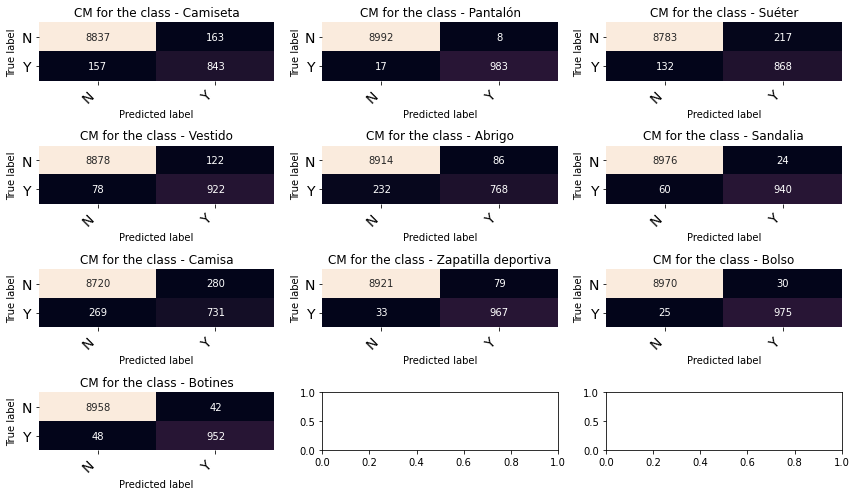

In [128]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 2. Caso varianza

### Regularizacion

#### Añadimos regularizacion L1_L2 a todas las capas de la red

In [129]:
keras.backend.clear_session()
model_reg = Sequential()
model_reg.add(Dense(140,activation='relu',input_dim=784))
model_reg.add(Dense(126,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
model_reg.add(Dense(70,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
model_reg.add(Dense(56,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
model_reg.add(Dense(14,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
model_reg.add(Dense(10,activation='softmax',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
optimizer = optimizers.Adam(0.001)
model_reg.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model_reg.fit(X_train_stand, y_train, epochs=60,  batch_size=2**5, verbose=0)

In [130]:
model_reg.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 724us/step - loss: 0.6551 - accuracy: 0.8881


[0.6550760269165039, 0.8881499767303467]

In [131]:
model_reg.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7071 - accuracy: 0.8692


[0.7071072459220886, 0.8691999912261963]

#### Ahora hacemos pruebas con dropout

In [132]:
keras.backend.clear_session()
model_dropout = Sequential()
model_dropout.add(Dense(140,activation='relu',input_dim=784))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(126,activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(70,activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(56,activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(14,activation='relu'))
model_dropout.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam(0.001)
model_dropout.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model_dropout.fit(X_train_stand, y_train, epochs=60,  batch_size=2**5, verbose=0)

In [133]:
model_reg.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 727us/step - loss: 0.6551 - accuracy: 0.8881


[0.6550760269165039, 0.8881499767303467]

In [134]:
model_reg.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 949us/step - loss: 0.7071 - accuracy: 0.8692


[0.7071072459220886, 0.8691999912261963]

# Modelo final

In [135]:
keras.backend.clear_session()
model_final = Sequential()
model_final.add(Dense(140,activation='relu',input_dim=784))
model_final.add(Dense(126,activation='relu'))
model_final.add(Dense(70,activation='relu'))
model_final.add(Dense(56,activation='relu'))
model_final.add(Dense(14,activation='relu'))
model_final.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam(0.001)
model_final.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])

In [136]:
history_final = model_final.fit(X_train_stand, y_train, epochs=100,  batch_size=2**5)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4807 - accuracy: 0.8279
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3508 - accuracy: 0.8712
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3184 - accuracy: 0.8838
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2939 - accuracy: 0.8905
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.8987
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2540 - accuracy: 0.9061
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2386 - accuracy: 0.9118
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2288 - accuracy: 0.9140
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2115 - accuracy: 0.9215
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 80/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0430 - accuracy: 0.9872
Epoch 81/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0378 - accuracy: 0.9888
Epoch 82/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0342 - accuracy: 0.9892
Epoch 83/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 84/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0408 - accuracy: 0.9879
Epoch 85/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0375 - accuracy: 0.9890
Epoch 86/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 87/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 88/100
1875/1875 [==============================] - 3s 1ms/step - loss:

In [137]:
model_final.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 737us/step - loss: 0.0253 - accuracy: 0.9930


[0.02527494542300701, 0.9930166602134705]

In [138]:
model_final.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.9313 - accuracy: 0.8950


[0.9313079118728638, 0.8949999809265137]

## Resultados

In [153]:
y_final_train_one_hot = model_final.predict(X_train_stand)
y_final_test_one_hot = model_final.predict(X_test_stand)

In [154]:
y_final_train = np.argmax(y_final_train_one_hot,axis=1)
y_final_test = np.argmax(y_final_test_one_hot,axis=1)

In [166]:
print('Red neuronal final\n\nTrain:\n')
print(classification_report(y_pred=y_final_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_final_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal final

Train:

                     precision    recall  f1-score   support

           Camiseta       0.99      1.00      0.99      6000
           Pantalón       1.00      1.00      1.00      6000
             Suéter       0.99      0.99      0.99      6000
            Vestido       0.99      0.99      0.99      6000
             Abrigo       0.99      0.99      0.99      6000
           Sandalia       0.99      1.00      0.99      6000
             Camisa       0.99      0.98      0.99      6000
Zapatilla deportiva       1.00      0.98      0.99      6000
              Bolso       1.00      1.00      1.00      6000
            Botines       1.00      1.00      1.00      6000

           accuracy                           0.99     60000
          macro avg       0.99      0.99      0.99     60000
       weighted avg       0.99      0.99      0.99     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.81      0.85    

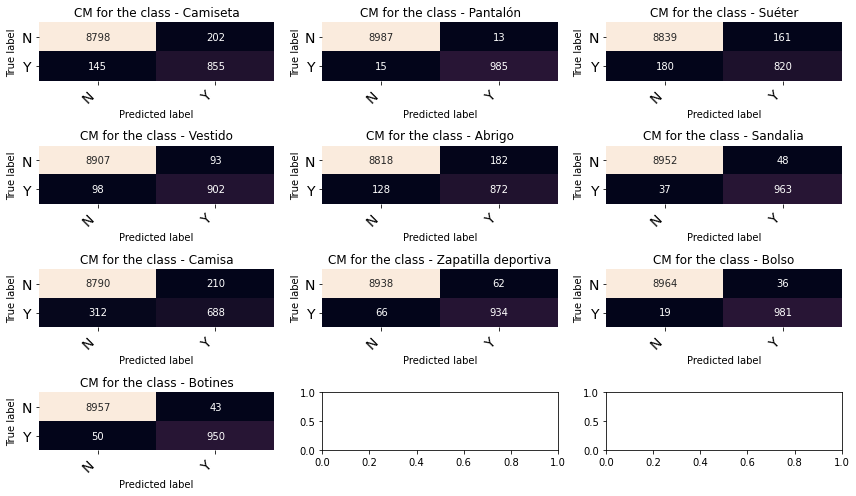

In [155]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_final_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

### Aumento de acuracy por epoch

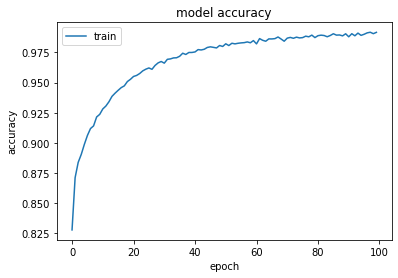

In [152]:
plt.plot(history_final.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

### Disminucion del error por epoch

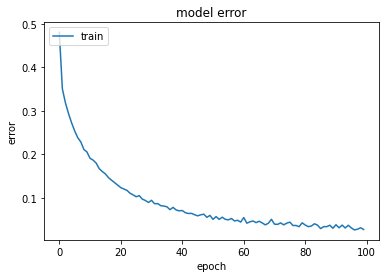

In [165]:
plt.plot(history_final.history['loss'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()